In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#1
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [55]:
#2.1
df.shape

(10000, 3)

In [56]:
#2.2
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [57]:
#2.3
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

In [58]:
#3.1
# df.nunique()
df['duplicates'] = df.duplicated()
df_or = df[df['duplicates'] == True].head()
if df_or.empty:
    print("В датасете нет дубликатов")
else:
    print("Есть дубликаты", df_or)

В датасете нет дубликатов


In [59]:
#3.2
# Замена пустых значений нулями
df_filled_zero = df.fillna(0)
df_filled_zero

,Gender,Height,Weight,duplicates
0,Male,73.847017,241.893563,False
1,Male,68.781904,162.310473,False
2,Male,74.110105,212.740856,False
3,Male,71.730978,220.042470,False
4,Male,69.881796,206.349801,False
...,...,...,...,...
9995,Female,66.172652,136.777454,False
9996,Female,67.067155,170.867906,False
9997,Female,63.867992,128.475319,False
9998,Female,69.034243,163.852461,False


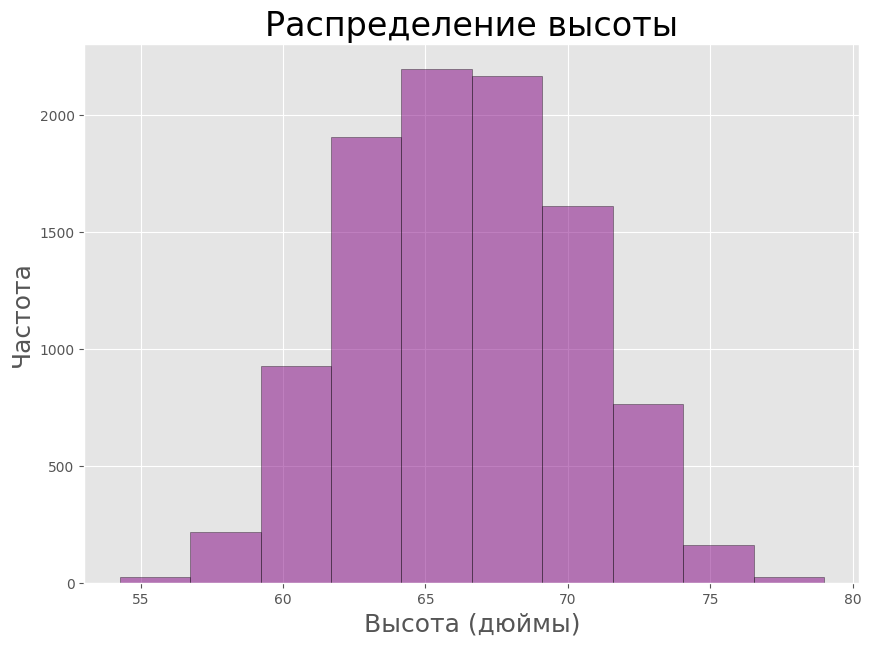

In [3]:
#4.1 Диаграмма роста
df.Height.plot(kind='hist',
              color='purple', edgecolor='black', alpha=0.5,
              figsize=(10, 7))
plt.title('Распределение высоты', size=24)
plt.xlabel('Высота (дюймы)', size=18)
plt.ylabel('Частота', size=18)
plt.show()

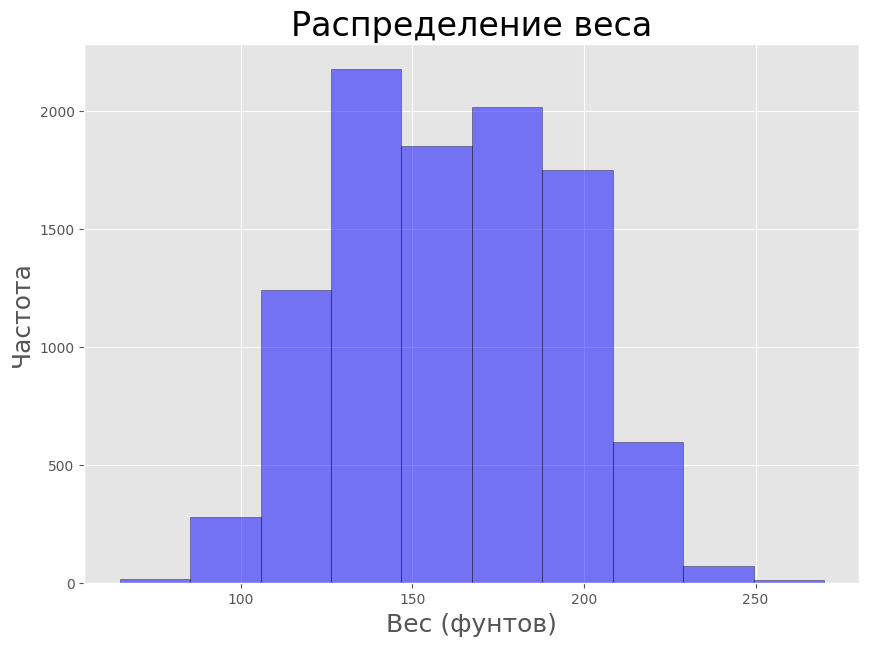

In [61]:
#4.2 Диаграмма веса
df.Weight.plot(kind='hist',
              color='blue', edgecolor='black', alpha=0.5,
              figsize=(10, 7))
plt.title('Распределение веса', size=24)
plt.xlabel('Вес (фунтов)', size=18)
plt.ylabel('Частота', size=18)
plt.show()

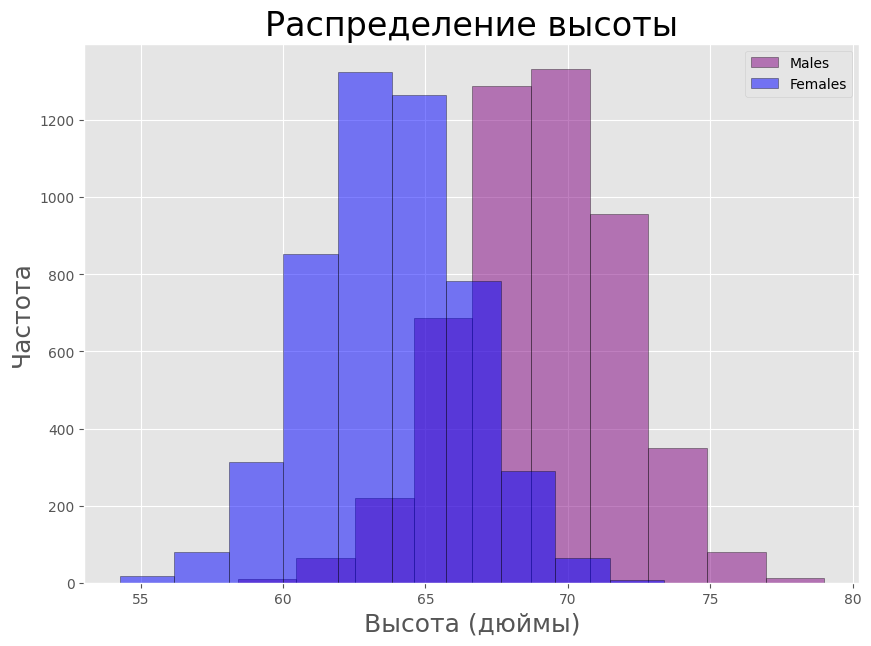

In [62]:
df[df['Gender'] == 'Male'].Height.plot(kind='hist',
                                  color='purple', edgecolor='black', alpha=0.5,
                                  figsize=(10, 7))

df[df['Gender'] == 'Female'].Height.plot(kind='hist',
                                  color='blue', edgecolor='black', alpha=0.5,
                                  figsize=(10, 7))

plt.legend(labels=['Males', 'Females'])
plt.title("Распределение высоты", size=24)
plt.xlabel('Высота (дюймы)', size=18)
plt.ylabel('Частота', size=18)
plt.show()

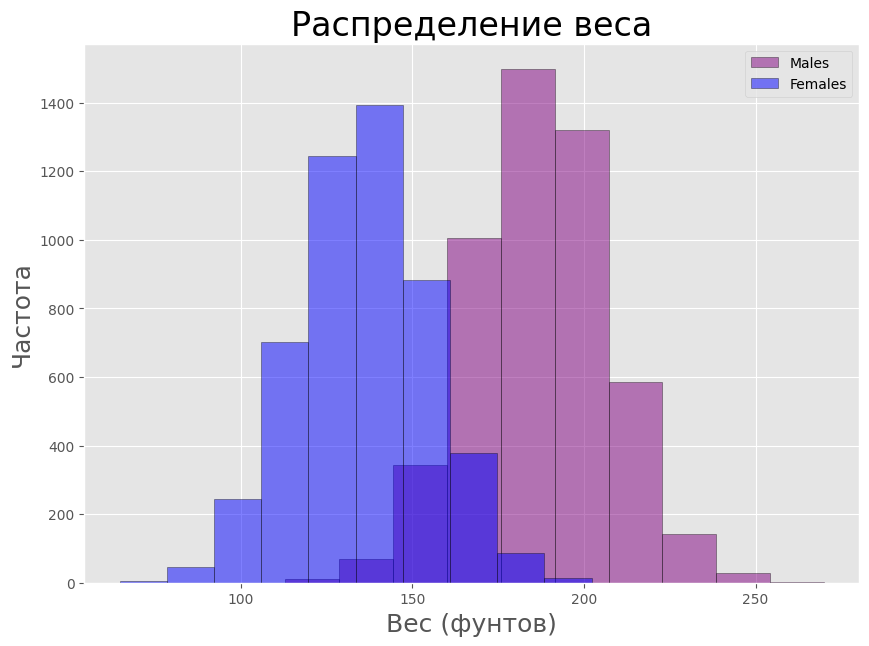

In [63]:
df[df['Gender'] == 'Male'].Weight.plot(kind='hist',
                                  color='purple', edgecolor='black', alpha=0.5,
                                  figsize=(10, 7))

df[df['Gender'] == 'Female'].Weight.plot(kind='hist',
                                  color='blue', edgecolor='black', alpha=0.5,
                                  figsize=(10, 7))

plt.legend(labels=['Males', 'Females'])
plt.title('Распределение веса', size=24)
plt.xlabel('Вес (фунтов)', size=18)
plt.ylabel('Частота', size=18)
plt.show()

In [64]:
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns = lambda x: x + '_male', inplace = True)

statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns = lambda x: x + '_female', inplace = True)

statistics = pd.concat([statistics_male, statistics_female], axis = 1) 
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,69.026346,187.020621,63.708774,135.860093
std,2.863362,19.781155,2.696284,19.022468
min,58.406905,112.902939,54.263133,64.700127
25%,67.174679,173.887767,61.894441,122.934096
50%,69.027709,187.033546,63.730924,136.117583
75%,70.988744,200.357802,65.563565,148.810926
max,78.998742,269.989699,73.389586,202.237214


In [14]:
# Функция для обучения модели и предсказания веса на основе роста и пола
def predict_weight(df, gender, height):
    # Фильтруем данные по полу
    df_filtered = df[df['Gender'] == ('Male' if gender == 0 else 'Female')]
    
    # Разделяем данные на обучающий и тестовый наборы
    X_train, X_test, y_train, y_test = train_test_split(df_filtered[['Height']], df_filtered['Weight'], test_size=0.2, random_state=42)
    
    # Создаем и обучаем модель линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Предсказываем вес на основе роста
    predicted_weight = model.predict([[height]])
    return predicted_weight[0]

# Задаем пол и рост для предсказания веса
gender_choice = int(input('0 - Мужской пол, 1 – Женский')) 
height_to_predict = int(input('Введите рост человека в см'))/2.54  

# Вызываем функцию predict_weight для предсказания веса
predicted_weight = predict_weight(df, gender_choice, height_to_predict)
print(f"Предсказанный вес человека {'мужского' if gender_choice == 0 else 'женского'} пола с ростом {int(height_to_predict*2.54)} см : {int(predicted_weight*0.45359237)} кг")



0 - Мужской пол, 1 – Женский 1
Введите рост человека в см 170


Предсказанный вес человека женского пола с ростом 170 см : 70 кг


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
# Преобразуем столбец 'Gender' в бинарный формат (0 для 'Male', 1 для 'Female')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Вычисляем коэффициенты корреляции
correlation_matrix = df.corr()

print(correlation_matrix)

              Gender    Height    Weight  duplicates
Gender      1.000000 -0.691072 -0.796723         NaN
Height     -0.691072  1.000000  0.924756         NaN
Weight     -0.796723  0.924756  1.000000         NaN
duplicates       NaN       NaN       NaN         NaN


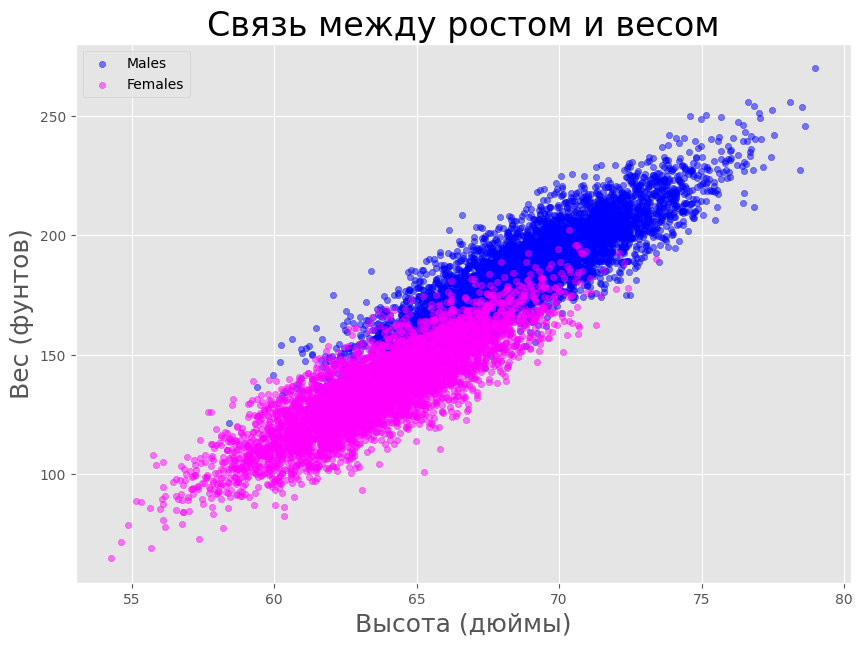

In [66]:
#остальные графики
df_2 = pd.read_csv('weight-height.csv')
ax1 = df_2[df_2['Gender'] == 'Male'].plot(
        kind='scatter',
        x='Height', y='Weight',
        color='blue', alpha=0.5,
        figsize=(10, 7))

df_2[df_2['Gender']== 'Female'].plot(
        kind='scatter',
        x='Height', y='Weight', color='magenta', alpha=0.5,
        figsize=(10, 7), ax=ax1)

plt.legend (labels = ['Males', 'Females'])
plt.title('Связь между ростом и весом', size=24)
plt.ylabel('Вес (фунтов)', size=18)
plt.xlabel('Высота (дюймы)', size=18)
plt.show()

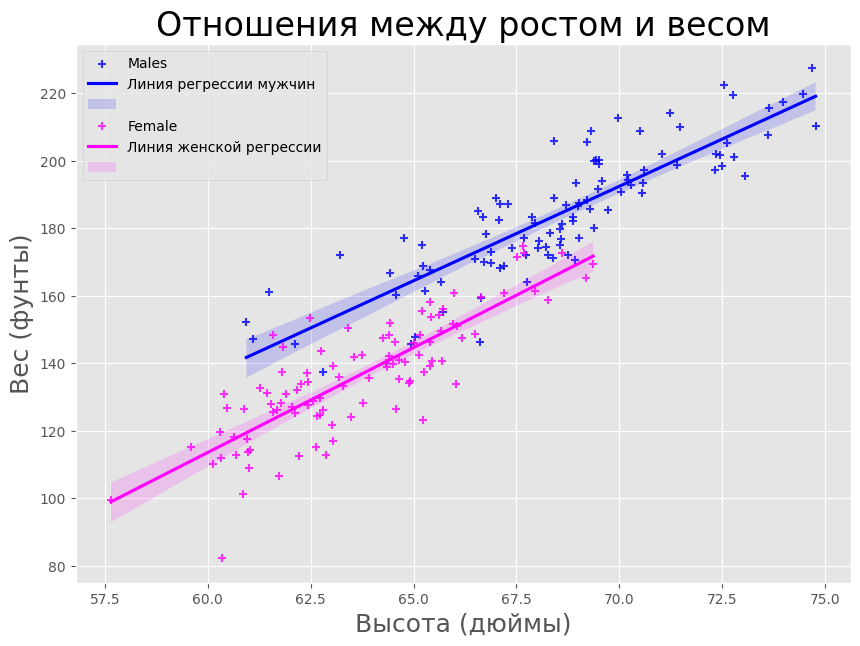

In [67]:
# Образцы
df_males_sample= df_2[df_2['Gender'] == 'Male'].sample(100) 
df_females_sample= df_2[df_2['Gender'] == 'Female'].sample (100)

# График регрессии с использованием seaborn. 
fig = plt.figure(figsize=(10,7)) 
sns.regplot(x=df_males_sample.Height,
            y=df_males_sample.Weight,
            color='blue', 
            marker='+')

sns.regplot(x=df_females_sample.Height,
            y=df_females_sample.Weight,
            color='magenta', 
            marker='+'
            )

# Легенда, название
plt.legend (labels=['Males', "Линия регрессии мужчин", '', 'Female', "Линия женской регрессии", ''])
plt.title("Отношения между ростом и весом", size=24) 
plt.xlabel("Высота (дюймы)", size=18) 
plt.ylabel('Вес (фунты)', size=18)
plt.show()

In [6]:
## Часть 2
# Взял Датасет "ПРОДАЖИ", для удобства переименовал его в sales
# Изменил кодировку файла на utf-8, загрузил его в папку проекта
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Загрузка датасета

df_e2 = pd.read_csv('sales.csv', sep=";")
df_e2.head()

,N,TV,Radio,Newspaper,Sales
0,1,"230,10","37,80","69,20","22,10"
1,2,"44,50","39,30","45,10","10,40"
2,3,"17,20","45,90","69,30","9,30"
3,4,"151,50","41,30","58,50","18,50"
4,5,"180,80","10,80","58,40","12,90"


In [11]:
# Обработка пропусков
df_e2 = df_e2.dropna()

In [13]:
# Преобразование всех столбцов в строковом формате в числовые, заменяя запятые на точки
for column in df_e2.columns:
    if df_e2[column].dtype == object:  # Проверка, является ли столбец строковым
        # Замена запятых на точки и преобразование в числовой формат
        df_e2[column] = df_e2[column].str.replace(',', '.').astype(float)

# Проверка, что замена прошла успешно
print(df_e2.head())

     N     TV  Radio  Newspaper  Sales
0  1.0  230.1   37.8       69.2   22.1
1  2.0   44.5   39.3       45.1   10.4
2  3.0   17.2   45.9       69.3    9.3
3  4.0  151.5   41.3       58.5   18.5
4  5.0  180.8   10.8       58.4   12.9


In [14]:
# Определение формата данных
df_e2.dtypes

N            float64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [16]:
# Проверка корректности отображения
df_e2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          200 non-null    float64
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [21]:
# Описание набора данных
# Выбор статистических показателей
statistics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Получение описательной статистики без учета количества элементов (count)
description = df_e2.describe().loc[statistics]
description

,N,TV,Radio,Newspaper,Sales
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
#в моем датасете не было категориальных данных

In [26]:
# Удаление стобца 'N' за ненадобностью
df_e2.drop('N', axis=1, inplace=True)

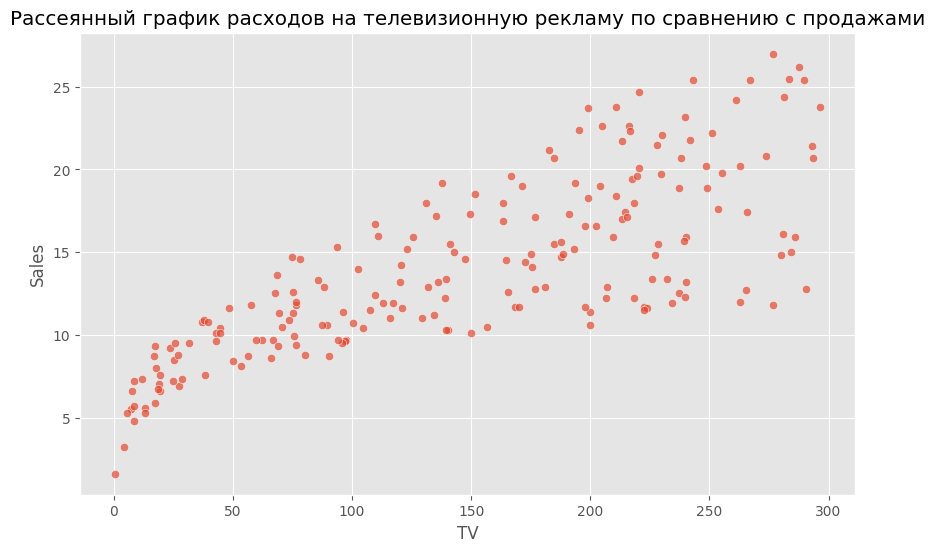

In [68]:
# Диаграмма рассеяния для TV и Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e2, x='TV', y='Sales', alpha=0.7)
plt.title('Рассеянный график расходов на телевизионную рекламу по сравнению с продажами')
plt.show()

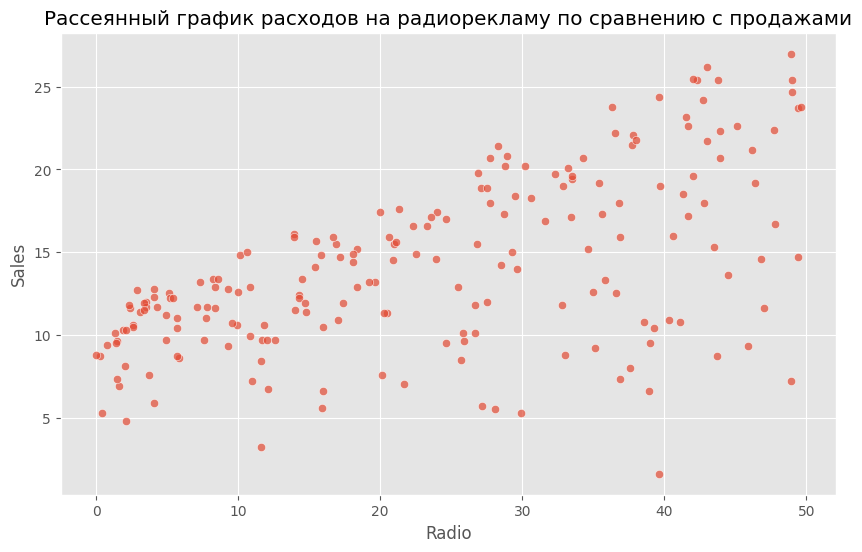

In [69]:
# Диаграмма рассеяния для Radio и Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e2, x='Radio', y='Sales', alpha=0.7)
plt.title('Рассеянный график расходов на радиорекламу по сравнению с продажами')
plt.show()

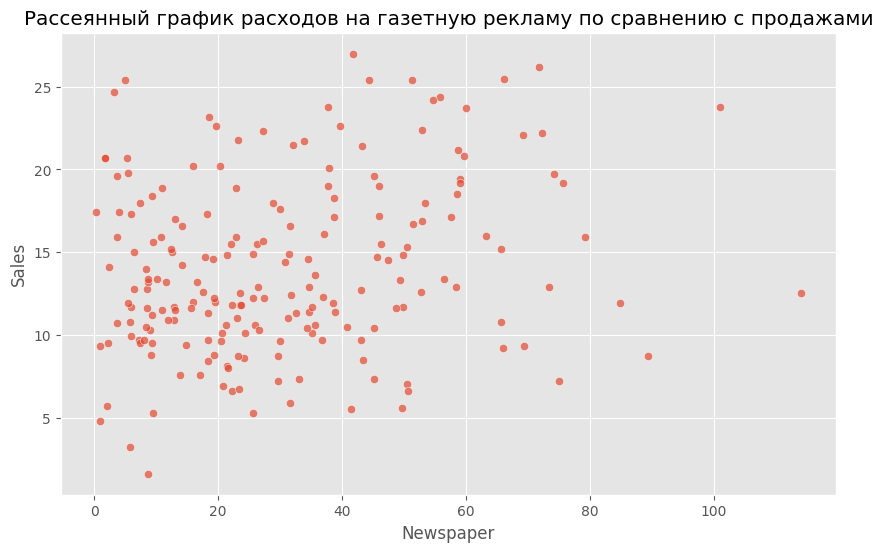

In [70]:
# Диаграмма рассеяния для Newspaper и Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_e2, x='Newspaper', y='Sales', alpha=0.7)
plt.title('Рассеянный график расходов на газетную рекламу по сравнению с продажами')
plt.show()

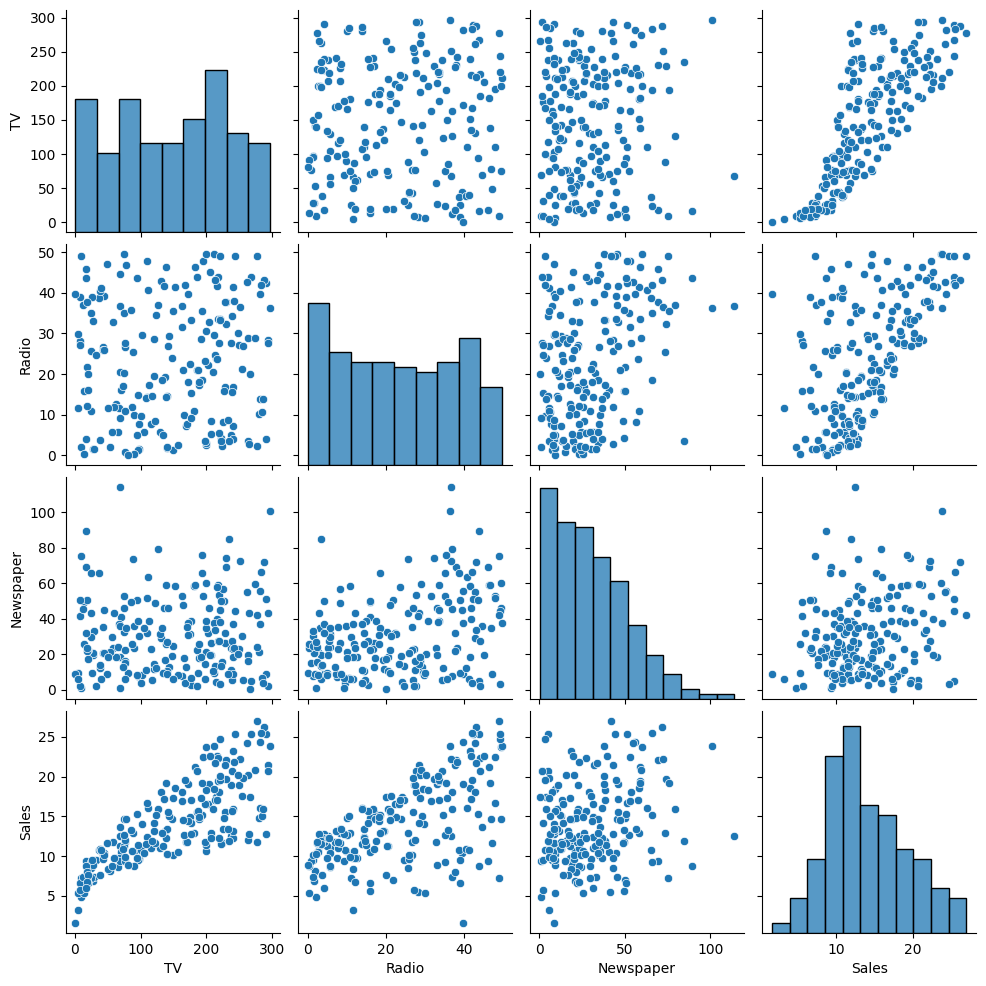

In [30]:
# Матрица диаграмм рассеяния
sns.pairplot(df_e2)
plt.show()

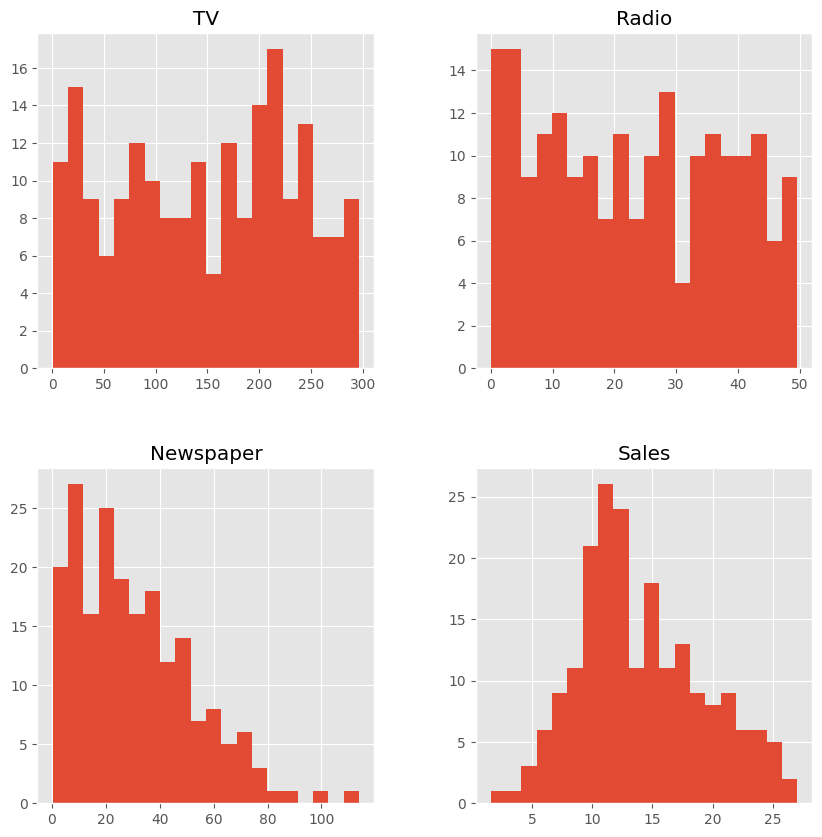

In [74]:
# Гистограммы для каждого признака, x_axis – промежуток значений
# y_axis - количество наблюдений данных значений
# bins=20 – количество столбцов (корзин)
df_e2.hist(bins=20, figsize=(10, 10))
plt.show()

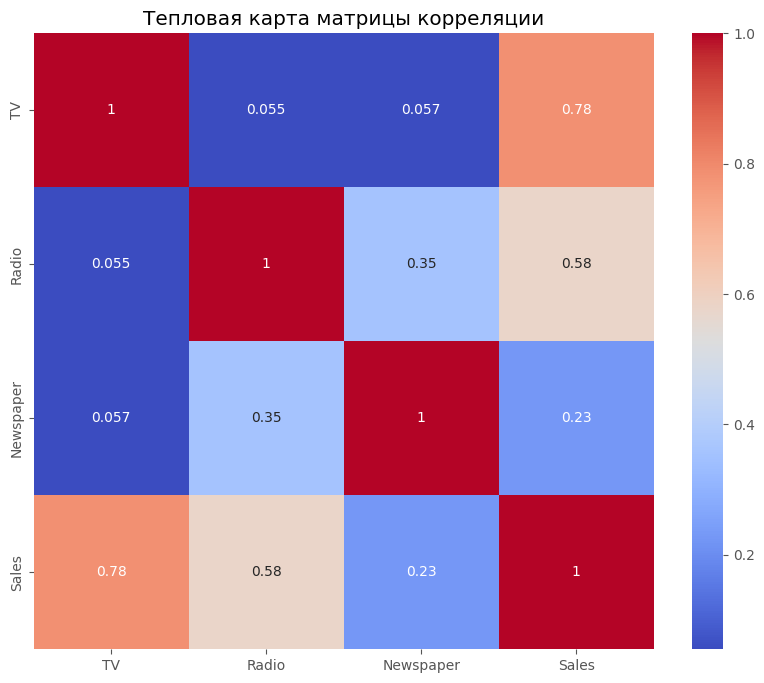

In [71]:
# Тепловая карта для корреляции между признаками
plt.figure(figsize=(10, 8))
sns.heatmap(df_e2.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта матрицы корреляции')
plt.show()

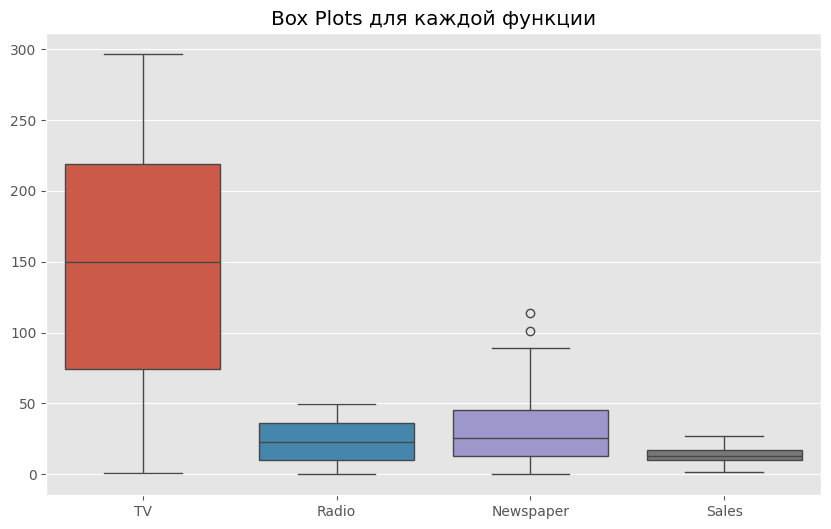

In [72]:
## Box Plots для каждого признака
# Минимальное значение - это самая нижняя точка на графике.
# Первый квартиль (Q1) - это место, где 25% данных находятся ниже него.
# Медиана - это центральная линия ящика. Если число наблюдений четное, то медиана является средним арифметическим двух центральных значений. Если число наблюдений нечетное, то медиана - это центральное значение.
# Третий квартиль (Q3) - это место, где 75% данных находятся ниже него.
# Максимальное значение - это самая верхняя точка на графике.
# Выбросы (outliers) обычно отмечаются как отдельные точки выше верхней границы.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_e2)
plt.title('Box Plots для каждой функции')
plt.show()

In [34]:
# Определение зависимой переменной
# мы хотим предсказать продажи ('Sales')
dependent_variable = 'Sales'

# Определение независимых переменных
# Все остальные столбцы, кроме 'Sales', будут считаться независимыми переменными
independent_variables = df_e2.columns.tolist()
independent_variables.remove(dependent_variable)

# Подготовка входных данных
X = df_e2[independent_variables]
y = df_e2[dependent_variable]

# Проверка подготовленных данных
print("Зависимые переменные (X):")
print(X.head())
print("\nЦелевая переменная (y):")
print(y.head())

Зависимые переменные (X):
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

Целевая переменная (y):
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [37]:
# Вычисление корреляции между зависимой переменной и независимыми переменными
correlation_matrix = df_e2.corr()

# Выбор признаков с высокой корреляцией с зависимой переменной
threshold = 0.2  # Порог корреляции
selected_features = correlation_matrix[dependent_variable][(correlation_matrix[dependent_variable] > threshold) | (correlation_matrix[dependent_variable] < -threshold)].index.tolist()
selected_features.remove(dependent_variable)  # Исключаем зависимую переменную из списка выбранных признаков

# Проверка выбранных признаков
print("Выбранные признаки для прогноза:")
print(selected_features)

# Подготовка входных данных для модели
X = df_e2[selected_features]
y = df_e2[dependent_variable]

Выбранные признаки для прогноза:
['TV', 'Radio', 'Newspaper']


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Вычисление VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["feature"] = independent_variables
vif_data["VIF"] = [variance_inflation_factor(df_e2[independent_variables].values, i) for i in range(len(independent_variables))]
print(vif_data)

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


In [45]:
import statsmodels.api as sm

# Последний столбец в df_e2 - это целевая переменная
target_variable = df_e2.columns[-1]
X = df_e2.drop(target_variable, axis=1)
y = df_e2[target_variable]

# Добавление константы для включения свободного члена в модель
X = sm.add_constant(X)

# Функция для обратного отбор признаков
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while (len(features) > 1):
        model = sm.OLS(target, data[features]).fit()
        max_p_value = np.max(model.pvalues)
        if max_p_value >= significance_level:
            excluded_feature = model.pvalues.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features


# Функция для прямого отбор признаков
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features) > 1):
        remaining_features = [f for f in initial_features if f not in best_features]
        p_values = []
        for feature in remaining_features:
            model = sm.OLS(target, data[best_features+[feature]]).fit()
            p_values.append(model.pvalues[feature])
        min_p_value = np.min(p_values)
        if min_p_value < significance_level:
            best_feature = remaining_features[p_values.index(min_p_value)]
            best_features.append(best_feature)
        else:
            break
    return best_features

# Применение обратного отбор признаков
backward_features = backward_elimination(X, y)
print("Обратный отбор признаков:", backward_features)

# Применение прямого отбор признаков
forward_features = forward_selection(X, y)
print("Прямой отбор признаков:", forward_features)

Обратный отбор признаков: ['const', 'TV', 'Radio']
Прямой отбор признаков: ['TV', 'Radio', 'const']


In [46]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)

Размер обучающего набора: (160, 4)
Размер тестового набора: (40, 4)


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Создание экземпляра модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

# Вычисление метрик оценки модели

mse = mean_squared_error(y_test, y_pred) 
# это среднеквадратичная ошибка, 
# которая суммирует квадраты разностей между 
# фактическими и прогнозируемыми значениями. 
# Чем меньше MSE, тем лучше модель.

mae = mean_absolute_error(y_test, y_pred)
# это средняя абсолютная ошибка, 
# которая вычисляется как среднее абсолютное 
# значение разностей между фактическими и прогнозируемыми значениями.

r2 = r2_score(y_test, y_pred)
# это коэффициент детерминации, 
# который показывает, насколько хорошо модель 
# объясняет изменения в целевой переменной. 
# Чем ближе R^2 к 1, тем лучше модель.

# Вывод результатов
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)

Mean Squared Error (MSE): 3.1740973539761024
Mean Absolute Error (MAE): 1.4607567168117606
R^2 Score: 0.8994380241009121


In [78]:
## Предсказание объемов продаж на основе введенных данных

# Ввод данных
TV_mc = float(input("Бюджет на ТВ-рекламу: "))
Radio_mc = float(input("Бюджет на Радио-рекламу: "))
Newspaper_mc = float(input("Бюджет на Газетную рекламу: "))

# Датасет с новыми данными
new_data_e2 = pd.DataFrame({
    'TV': [TV_mc],  # Новый бюджет рекламы на телевидении
    'Radio': [Radio_mc],  # Новый бюджет рекламы в радио
    'Newspaper': [Newspaper_mc]  # Новый бюджет рекламы в газетах
})

# Добавление константы
new_data_with_const = sm.add_constant(new_data_e2, has_constant='add')

# Прогноз объема продаж для новых данных
sales_prediction = model.predict(new_data_with_const)
print("Прогноз объема продаж:", sales_prediction)

Бюджет на ТВ-рекламу:  70
Бюджет на Радио-рекламу:  50
Бюджет на Газетную рекламу:  90


Прогноз объема продаж: [15.81838656]
